# EJERCICIO 1

EDA: Exploratory Data Analysis.
Get the CalCofi data set  from https://www.kaggle.com/datasets/sohier/calcofi

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.


# 1. Exportación e instalación de paquetes

In [1]:
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("Plots")
#Pkg.add("Statistics")
#Pkg.add("BenchmarkTools")
#Pkg.add("StatsBase")
import Pkg;
Pkg.offline(true)
using Base.Threads
using BenchmarkTools
using CSV
using DataFrames
using Statistics
using Printf: @printf
using Plots
using StatsBase

# 2. Lectura del archivo CSV 

Se realiza la conversion a DataFrame

In [2]:

println(isfile("../dat/bottle.csv"))
dir = "../dat/"
filename = "bottle.csv"
dr = dir*filename
# Carga del archivo CSV
df = df = CSV.read(dr, DataFrame);
#first(df, 10);

true


864863×74 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      2 │       1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      3 │       1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      4 │       1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      5 │       1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      6 │       1        6  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      7 │       1        7  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      8 │       1        8  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 864857 │   34403   864857  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…     ⋯
 864858 │   34403   864858  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…
 864859 │   34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864860 │   34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864861 │   34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…     ⋯
 864862 │   34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864863 │   34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
                                              70 columns and 864848 rows omitted

1. Se obtiene un listado del número de columnas, el tipo de dato por columna y los datos de la cabecera.

In [3]:
# Get the data list shape
println("Data Shape: ", size(df))

data_types = eltype.(eachcol(df))
for data_type  in data_types
println("Data Types: ", data_type)
end
# Describir el conjunto de datos
names(df)


Data Shape: (864863, 74)
Data Types: Int64
Data Types: Int64
Data Types: String15
Data Types: String
Data Types: Int64
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Int64}
Data Types: Int64
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing, Int64}
Data Types: Union{Missing, Float64}
Data Types: Union{Missing

74-element Vector{String}:
 "Cst_Cnt"
 "Btl_Cnt"
 "Sta_ID"
 "Depth_ID"
 "Depthm"
 "T_degC"
 "Salnty"
 "O2ml_L"
 "STheta"
 "O2Sat"
 ⋮
 "R_PRES"
 "R_SAMP"
 "DIC1"
 "DIC2"
 "TA1"
 "TA2"
 "pH2"
 "pH1"
 "DIC Quality Comment"

describe facilita la visualización de algunos datos estadsticos interesantes del DataFrame

In [4]:
describe(df)

74×7 DataFrame
 Row │ variable             mean      min                                media ⋯
     │ Symbol               Union…    Any                                Union ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt              17138.8   1                                  16848 ⋯
   2 │ Btl_Cnt              432432.0  1                                  43243
   3 │ Sta_ID                         001.0 168.0                             
   4 │ Depth_ID                       19-4903CR-HY-060-0930-05400560-0…       
   5 │ Depthm               226.832   0                                  125.0 ⋯
   6 │ T_degC               10.7997   1.44                               10.06
   7 │ Salnty               33.8404   28.431                             33.86
   8 │ O2ml_L               3.39247   -0.01                              3.44
  ⋮  │          ⋮              ⋮                      ⋮                     ⋮  ⋱
  68 │ DIC1                 2153.24   1948.85                            2170. ⋯
  69 │ DIC2                 2168.15   1969.44                            2265.
  70 │ TA1                  2256.06   2181.57                            2244.
  71 │ TA2                  2278.86   2198.15                            2247.
  72 │ pH2                  7.94857   7.9231                             7.946 ⋯
  73 │ pH1                  7.91098   7.6183                             7.928
  74 │ DIC Quality Comment            Bottle tripped at correct depth         
                                                   4 columns and 59 rows omitted

# 3. Limpieza de datos

Se pudo observar que hay columnas con perdida de infomación (missings). Para continuar con el tratamiento la idea sugerida es medir el porcentaje de datos missing por columna y después determinar con un parámetro (umbral) que cantidad de perdidas serán admitidas por columna para formar un data frame limpio y listo para analizar posteriormente.

La siguiente función realiza el conteo de *missings per column*

In [5]:
# Cleaninig
# Counting missing columns
function count_missing(column)#::Vector)
    return sum(ismissing, column)
    end

for column in names(df)
        println("Missing in column $column: ", count_missing(df[!, column]))
end

Missing in column Cst_Cnt: 0
Missing in column Btl_Cnt: 0
Missing in column Sta_ID: 0
Missing in column Depth_ID: 0
Missing in column Depthm: 0
Missing in column T_degC: 10963
Missing in column Salnty: 47354
Missing in column O2ml_L: 168662
Missing in column STheta: 52689
Missing in column O2Sat: 203589
Missing in column Oxy_µmol/Kg: 203595
Missing in column BtlNum: 746196
Missing in column RecInd: 0
Missing in column T_prec: 10963
Missing in column T_qual: 841736
Missing in column S_prec: 47354
Missing in column S_qual: 789949
Missing in column P_qual: 191108
Missing in column O_qual: 680187
Missing in column SThtaq: 799040
Missing in column O2Satq: 647066
Missing in column ChlorA: 639591
Missing in column Chlqua: 225697
Missing in column Phaeop: 639592
Missing in column Phaqua: 225693
Missing in column PO4uM: 451546
Missing in column PO4q: 413077
Missing in column SiO3uM: 510772
Missing in column SiO3qu: 353997
Missing in column NO2uM: 527287
Missing in column NO2q: 335389
Missing in

La siguiente función calcula el porcentaje y muestra la lista ordenada descendentemente, segun el porcentaje de datos perdidos por columna.

In [6]:
# Missing columns percent 
    # Percent calculus of every missing sum divided by number of rows from data set.
function missingPercent(df::DataFrame)
        mpercent = Dict(column => sum(ismissing, df[!, column]) / nrow(df) * 100 for column in names(df) )
    sorted_percent = sort(collect(mpercent), by = x -> x[2], rev = true)
end
percentList =  missingPercent(df)
println("Porcentaje de valores faltantes por columna, en orden descendente")
for (column, percent) in percentList
    println("$column: $percent%")
end

Porcentaje de valores faltantes por columna, en orden descendente
pH2: 99.99884374750683%
DIC Quality Comment: 99.99364061128757%
pH1: 99.99028747905737%
DIC2: 99.97409994415301%
TA2: 99.97294369165984%
DIC1: 99.76886512661542%
TA1: 99.75903698042349%
C14A2p: 98.5267030732035%
C14A1p: 98.5246218187158%
C14As2: 98.33337765634556%
C14As1: 98.33129640185787%
IncTim: 98.33071827561129%
LightP: 97.84347347498968%
MeanAp: 97.63465427472327%
DarkAp: 97.63465427472327%
DarkAs: 97.38120372822054%
MeanAs: 97.38108810297122%
T_qual: 97.32593485904704%
NH3uM: 92.4887525538727%
R_NH4: 92.48644004888635%
SThtaq: 92.3891992142108%
S_qual: 91.33805007267047%
BtlNum: 86.27909853930622%
R_SAMP: 85.89302583183695%
O_qual: 78.64679145714408%
O2Satq: 74.81716757451758%
Phaeop: 73.95298446112274%
ChlorA: 73.95286883587343%
R_PHAEO: 73.95252196012547%
R_CHLA: 73.95240633487616%
NO3uM: 60.987694004715195%
R_NO3: 60.98676900272066%
NO2uM: 60.967690836583365%
R_NO2: 60.966765834588834%
SiO3uM: 59.05813984411404

*deleteColumns* es la función con la que se determina la cantidad de datos perdidos que serán admitidos por columna.
Aquí he elegido que solo se admitirán hasta aproximadamente una perdida de 1/3 de los datos.

In [7]:
# Threshold 50%
# Delete data function
function deleteColumns(df, threshold)
    cols_to_drop = [col for col in names(df) if sum(ismissing, df[!, col]) / nrow(df) * 100 > threshold]
    return select(df, Not(cols_to_drop))
end
    df_cleaned = deleteColumns(df, 33)  # Con el valor de 33 indico que solo admitiré hasta una perdida de 2/3 de los datos aproximadamente 
    size(df_cleaned)


(864863, 32)

In [8]:
#=data_types = eltype.(eachcol(df_cleaned))
for data_type  in data_types
println("Data Types: ", data_type)
end=#

# 4. Calculo de la matriz de correlación

Para realizar este calculo se debe asegurar que los datos son de tipo númerico, hasta este punto se tienen aún datos de tipo String. Lo más sencillo es eliminarlos si se trata atributos no reelevantes como nombres propios, constantes, texto no estructurado, etc.
Sin embargo existen algunos casos en los que convertir datos no númericos en datos númericos puede ser de gran útilidad, sí estos datos son capaces de brindar información reelevante.

En este caso se eligió solo eliminar los strings con el fin de mantener solo la parte númerica, debido a que los unicos datos de tipo string no parecen brindar demasiados detalles, además de ser parámetros de identificación.


Después de esta limpieza el data frame se reduce a 30 columnas en este ejemplo.

In [9]:
# Correlation Matrix 
function numericalData(df::DataFrame)
cols_numerical = [col for col in names(df) if 
                                !occursin("String", string(eltype(df[!, col])))]
# Crear un nuevo DataFrame con solo las columnas numéricas
    return df[:, cols_numerical]
end
df_numerical = numericalData(df_cleaned)
@show size(df_numerical)



size(df_numerical) = (864863, 30)


(864863, 30)

Algunas funciones alternativas para solo obtener la parte numerica del dataframe

In [10]:
#Otras opción para numericalData, especificando los tipos de dato que se desea conservar.
#=function numericalData(df::DataFrame)
cols_numerical = [col for col in names(df) if 
                             (eltype(df[!, col]) == Int64) || 
                      (eltype(df[!, col]) == Float64) || 
                      (eltype(df[!, col]) == Union{Missing, Int64}) ||
                      (eltype(df[!, col]) == Union{Missing, Float64})]
# Crear un nuevo DataFrame con solo las columnas numéricas
    return df[:, cols_numerical]
end
df_numerical = numericalData(df_cleaned)=#

In [11]:
#numeric_columns = names(df_cleaned)[map(x -> isa(df[!, x], AbstractVector{<:Real}), names(df_cleaned))]
# AbstractVector(x) no lee los tipos de dato missing 

Se convierte el dataFrame a matriz y se calcula la matriz de correlación

In [12]:
M = Matrix(df_numerical) # Convierto el DataFrame en Matriz
correlation_matrix = cor(M, dims=1)

30×30 Matrix{Union{Missing, Float64}}:
  1.0        0.999345  -0.162222   …   missing   missing  -0.161961
  0.999345   1.0       -0.161617       missing   missing  -0.161348
 -0.162222  -0.161617   1.0            missing   missing   0.999994
   missing    missing    missing       missing   missing    missing
   missing    missing    missing       missing   missing    missing
   missing    missing    missing   …   missing   missing    missing
   missing    missing    missing       missing   missing    missing
   missing    missing    missing       missing   missing    missing
   missing    missing    missing       missing   missing    missing
 -0.100142  -0.100828   0.0823158      missing   missing   0.0821835
  ⋮                                ⋱                      
   missing    missing    missing       missing   missing    missing
   missing    missing    missing       missing   missing    missing
   missing    missing    missing       missing   missing    missing
   missing    mis

## 4.1 Gráfica de la matriz

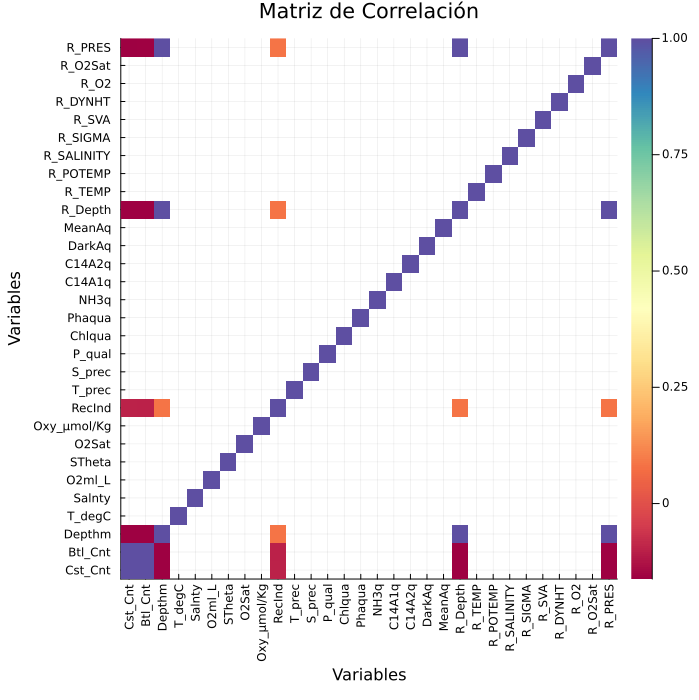

"/home/luna/Escritorio/env_01/Tarea/Ejercicio01/fig/correlation_matrixI.png"

In [13]:
column_names = names(df_numerical)

p = heatmap(   correlation_matrix,
    xlabel = "Variables",
    ylabel = "Variables",
    xticks = (1.0:length(column_names), column_names),
    yticks = (1.0:length(column_names), column_names),
    color=:Spectral,
    title = "Matriz de Correlación",
        xrotation = 90,
    size=(700, 700))
    display(p)

    savefig("../fig/correlation_matrixI.png")

# 5. *Removing outliers* usando IQR()

Esta función elimina los outliers (valores atípicos) de las columnas numéricas de un conjunto de datos utilizando el Rango Intercuartílico (IQR). El proceso se basa en los percentiles 25 y 75 de los datos:

    Q1: El percentil 25, que representa el valor que separa el 25% de los datos más bajos.
    Q3: El percentil 75, que representa el valor que separa el 25% de los datos más altos.

El IQR se calcula como la diferencia entre Q3 y Q1. Los valores atípicos se definen como aquellos que están por debajo de $ Q1 - 1.5 * IQR $ o por encima de $ Q3 + 1.5 * IQR $, y son eliminados de las columnas numéricas.

Este método es útil para limpiar los datos y asegurar que los análisis no se vean distorsionados por valores extremos que no son representativos del conjunto de datos.

In [14]:
function removeOutliersIQR(df)
    for col in names(df)
        if eltype(df[!, col]) <: Real
            q1, q3 = quantile(df[!, col], 0.25), quantile(df[!, col], 0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df = df[df[!, col] .>= lower_bound .&& df[!, col] .<= upper_bound, :]
        end
    end
    return df
    
end


removeOutliersIQR (generic function with 1 method)

In [15]:
df_IQR = removeOutliersIQR(df_numerical)

790980×30 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Depthm  T_degC    Salnty    O2ml_L       STheta    ⋯
        │ Int64    Int64    Int64   Float64?  Float64?  Float64?     Float64?  ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1       0    10.5     33.44    missing       25.649   ⋯
      2 │       1        2       8    10.46    33.44    missing       25.656  
      3 │       1        3      10    10.46    33.437   missing       25.654  
      4 │       1        4      19    10.45    33.42    missing       25.643  
      5 │       1        5      20    10.45    33.421   missing       25.643   ⋯
      6 │       1        6      30    10.45    33.431   missing       25.651  
      7 │       1        7      39    10.45    33.44    missing       25.658  
      8 │       1        8      50    10.24    33.424   missing       25.682  
   ⋮    │    ⋮        ⋮       ⋮        ⋮         ⋮           ⋮          ⋮      ⋱
 790974 │   34403   864857     500     5.993   34.216         0.456   26.9452  ⋯
 790975 │   34403   864858     521     5.818   34.2382        0.366   26.9848
 790976 │   34404   864859       0    18.744   33.4083        5.805   23.8706
 790977 │   34404   864860       2    18.744   33.4083        5.805   23.8707
 790978 │   34404   864861       5    18.692   33.415         5.796   23.8891  ⋯
 790979 │   34404   864862      10    18.161   33.4062        5.816   24.0143
 790980 │   34404   864863      15    17.533   33.388         5.774   24.153
                                              23 columns and 790965 rows omitted

In [16]:
column_names = names(df_IQR)
mc = Matrix(df_IQR)
c_m = cor(mc, dims=1)

q = heatmap(   correlation_matrix,
xlabel = "Variables",
ylabel = "Variables",
xticks = (1.0:length(column_names), column_names),
yticks = (1.0:length(column_names), column_names),
color=:Spectral,
title = "Matriz de Correlación IQR",
    xrotation = 90,
size=(1000, 1000))

#display(q)

savefig("../fig/correlation_matrixIQR.png")

"/home/luna/Escritorio/env_01/Tarea/Ejercicio01/fig/correlation_matrixIQR.png"

# 6. Eliminar puntos nulos

Función deleteRow(df, column)

Esta función elimina todas las filas de un DataFrame (df) en las que el valor de una columna específica (column) sea nulo o missing. Es útil para limpiar los datos cuando se quiere trabajar solo con registros completos en una columna determinada, eliminando aquellas filas que no contienen información válida para ese atributo.

Entrada:

    df: DataFrame del cual se eliminarán las filas.
    column: Nombre de la columna (en formato de símbolo o cadena) donde se verificarán los valores nulos.

Proceso: La función recorre la columna especificada y elimina las filas en las que el valor de esa columna sea missing.

In [17]:
#deleteRow(column): for a given column delete all the null data points.
function deleteRow(df, column)
    return df[.!ismissing.(df[!, column]), :]
end

df_no_missing = deleteRow(df_IQR, "T_degC");
#describe(df_no_missing)

780376×30 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Depthm  T_degC    Salnty    O2ml_L       STheta    ⋯
        │ Int64    Int64    Int64   Float64?  Float64?  Float64?     Float64?  ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1       0    10.5     33.44    missing       25.649   ⋯
      2 │       1        2       8    10.46    33.44    missing       25.656  
      3 │       1        3      10    10.46    33.437   missing       25.654  
      4 │       1        4      19    10.45    33.42    missing       25.643  
      5 │       1        5      20    10.45    33.421   missing       25.643   ⋯
      6 │       1        6      30    10.45    33.431   missing       25.651  
      7 │       1        7      39    10.45    33.44    missing       25.658  
      8 │       1        8      50    10.24    33.424   missing       25.682  
   ⋮    │    ⋮        ⋮       ⋮        ⋮         ⋮           ⋮          ⋮      ⋱
 780370 │   34403   864857     500     5.993   34.216         0.456   26.9452  ⋯
 780371 │   34403   864858     521     5.818   34.2382        0.366   26.9848
 780372 │   34404   864859       0    18.744   33.4083        5.805   23.8706
 780373 │   34404   864860       2    18.744   33.4083        5.805   23.8707
 780374 │   34404   864861       5    18.692   33.415         5.796   23.8891  ⋯
 780375 │   34404   864862      10    18.161   33.4062        5.816   24.0143
 780376 │   34404   864863      15    17.533   33.388         5.774   24.153
                                              23 columns and 780361 rows omitted

Esta función borra todos los missings.

In [18]:
#=function deleteRow(df::DataFrame)
    return dropmissing(df)
end

# Uso de la función
df_no_missing = deleteRow(df_IQR)
#describe(df_no_missing)=#


# 7. Filtrar columnas por correlación

*filterColumnsByCorrelation* elimina o selecciona las columnas del DataFrame en función de su correlación con una columna objetivo (target_col) y un umbral de correlación (threshold). Dependiendo de la relación especificada (greater o less), la función selecciona las columnas cuya correlación con la columna objetivo sea mayor o menor que el umbral dado.

Entradas:

    df: DataFrame que contiene los datos a procesar.
    target_col: Nombre de la columna objetivo (tipo Symbol) con la cual se calcularán las correlaciones.
    threshold: Umbral de correlación (tipo Float64) que determina el límite de correlación para seleccionar las columnas.
    relation: Cadena que indica cómo se debe comparar la correlación con el umbral. Puede ser:
        "greater": Selecciona las columnas cuya correlación con la columna objetivo sea mayor que el umbral en valor absoluto.
        "less": Selecciona las columnas cuya correlación con la columna objetivo sea menor que el umbral en valor absoluto.

Proceso:

    Se verifica si la columna objetivo (target_col) existe en el DataFrame.
    Se calcula la correlación entre la columna objetivo y todas las demás columnas numéricas del DataFrame.
    Dependiendo del valor de relation, se seleccionan las columnas que tengan una correlación mayor o menor que el umbral (threshold).
    La función retorna un nuevo DataFrame que incluye la columna objetivo y las columnas seleccionadas según la correlación.

Salida:

    Un nuevo DataFrame que incluye la columna objetivo y las columnas seleccionadas que cumplen con el criterio de correlación.

In [19]:
function filterColumnsByCorrelation(df::DataFrame, target_col::Symbol, threshold::Float64, relation::String)
    
    # Validar que el target_col exista en el DataFrame
    if !(target_col in propertynames(df))  # Usamos propertynames que devuelve Symbols
        throw(ArgumentError("La columna objetivo no está en el DataFrame"))
    end

    # Calcular las correlaciones de todas las columnas con la columna objetivo
    correlations = Dict{Symbol, Float64}()
    for col in propertynames(df)
        if col != target_col
            # Usamos skipmissing() para manejar valores faltantes
            valid_data_target, valid_data_col = [], []
			            for (t, c) in zip(df[!, target_col], df[!, col])
                if !ismissing(t) && !ismissing(c)
                    push!(valid_data_target, t)
                    push!(valid_data_col, c)
                end
            end

            # Verificar que ambos vectores tengan suficientes datos para calcular la correlación
 if length(valid_data_target) > 1 && length(valid_data_col) > 1
                correlations[col] = cor(valid_data_col, valid_data_target)
            end
        end
    end

    # Filtrar columnas según la relación y el umbral
    if relation == "greater"
        selected_columns = [name for (name, corr) in correlations if abs(corr) > threshold]
    elseif relation == "less"
        selected_columns = [name for (name, corr) in correlations if abs(corr) < threshold]
    else
        throw(ArgumentError("La relación debe ser 'greater' o 'less'"))
    end

    # Crear un DataFrame con las columnas seleccionadas y la columna objetivo
    return select(df, [target_col; selected_columns]...)
end

filterColumnsByCorrelation (generic function with 1 method)

Se realiza el calculo para T_degC, en el valor 0.25 y se seleccionan las columnas cuya correlación con :T_degC sea mayor *"greater"* que este valor.

In [20]:
# Convertir los nombres de las columnas a símbolos
#rename!(df_no_missing, names(df_no_missing))
columna = names(df_no_missing)[2]
df_correlated = filterColumnsByCorrelation(df_no_missing, :T_degC, 0.25, "greater");


# 8. Descripción final del Data set *limpio*

Describir datos numéricos: media, mediana, etc para los datos correlacionados.

In [21]:
#describe() : it is used to describe data by giving following for each column/
# Describir datos numéricos: media, mediana, etc.
function describeII(df::DataFrame)
    stats = Dict(col => Dict(
        "mean" => mean(skipmissing(df[!, col])),
        "median" => median(skipmissing(df[!, col])),
        "std" => std(skipmissing(df[!, col])),
        "min" => minimum(skipmissing(df[!, col])),
        "max" => maximum(skipmissing(df[!, col]))
    ) for col in names(df))
    return stats
end

describeII (generic function with 1 method)

In [22]:
# Llamar a la función describeII con tu DataFrame
stats = describeII(df_correlated)

# Imprimir las estadísticas descriptivas
# println(stats)
# Imprimir las estadísticas de forma más legible
for (i, (col, values)) in enumerate(stats)
	println("Column $i:  $col")
	println("  Mean   : $(round(values["mean"], digits=2))")
	println("  Median : $(round(values["median"], digits=2))")
	println("  Std    : $(round(values["std"], digits=2))")
	println("  Min    : $(round(values["min"], digits=2))")
	println("  Max    : $(round(values["max"], digits=2))")
	println("*-"^15)
end

describe(df_correlated)

Column 1:  R_SVA
  Mean   : 232.39
  Median : 217.4
  Std    : 88.18
  Min    : 0.4
  Max    : 683.4
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column 2:  R_O2Sat
  Mean   : 60.76
  Median : 60.4
  Std    : 35.85
  Min    : -0.1
  Max    : 214.1
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column 3:  R_SALINITY
  Mean   : 33.79
  Median : 33.79
  Std    : 0.45
  Min    : 4.57
  Max    : 37.03
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column 4:  O2ml_L
  Mean   : 3.61
  Median : 3.8
  Std    : 1.99
  Min    : -0.01
  Max    : 11.13
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column 5:  STheta
  Mean   : 25.69
  Median : 25.84
  Std    : 1.13
  Min    : 20.93
  Max    : 250.78
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column 6:  R_TEMP
  Mean   : 11.4
  Median : 10.56
  Std    : 3.92
  Min    : 2.23
  Max    : 31.14
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column 7:  R_O2
  Mean   : 3.61
  Median : 3.8
  Std    : 1.99
  Min    : -0.01
  Max    : 11.13
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column 8:  T_degC
  Mean   : 11.4
  Median : 10.56
  Std    : 3.92
  Min    

17×7 DataFrame
 Row │ variable     mean        min      median   max      nmissing  eltype    ⋯
     │ Symbol       Float64     Real     Float64  Real     Int64     Type      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ T_degC        11.4031     2.23     10.56    31.14          0  Union{Mis ⋯
   2 │ Depthm       157.308      0       104.0    565             0  Int64
   3 │ Oxy_µmol/Kg  157.969     -0.4349  166.714  485.702    166209  Union{Mis
   4 │ R_SVA        232.388      0.4     217.4    683.4       31718  Union{Mis
   5 │ R_POTEMP      11.3949     0.0      10.56    31.14      25548  Union{Mis ⋯
   6 │ Salnty        33.7904    28.431    33.788   37.034     30146  Union{Mis
   7 │ STheta        25.693     20.934    25.843  250.784     32210  Union{Mis
   8 │ R_DYNHT        0.359418   0.0       0.31     1.34      28194  Union{Mis
  ⋮  │      ⋮           ⋮          ⋮        ⋮        ⋮        ⋮                ⋱
  11 │ R_PRES       158.182      0       104.0    570             0  Int64     ⋯
  12 │ R_O2Sat       60.7596    -0.1      60.4    214.1      163153  Union{Mis
  13 │ O2Sat         60.7833    -0.1      60.5    214.1      166205  Union{Mis
  14 │ R_Depth      157.309      0.0     104.0    565.0           0  Float64
  15 │ R_O2           3.6124    -0.01      3.8     11.13     142939  Union{Mis ⋯
  16 │ R_TEMP        11.4031     2.23     10.56    31.14          0  Union{Mis
  17 │ R_SIGMA       25.6855    20.934    25.83   250.784     31803  Union{Mis
                                                     1 column and 2 rows omitted

Guardo el CSV para el siguiente ejercicio.

In [24]:
CSV.write("../dat/bottle_cleaned.csv", df_correlated)

"../dat/bottle_cleaned.csv"